# Softmax regression

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Default seaborn theme, scaling & color palette
import pandas as pd
import numpy as np

## Load the dataset

In [2]:
iris = sns.load_dataset("iris")

## Use all 4 features to predict the 3 classes

In [8]:
y_s = pd.Categorical(iris['species']).codes  # 0, 1, 2
x_n = iris.columns[:-1]  # The feature names
x_s = iris[x_n].values  # Data - all 4 features
x_s = (x_s - x_s.mean(axis=0))/x_s.std(axis=0)  # standardise per feature
print('Num data samples =', x_s.shape[0])

Num data samples = 150


## Build the model

In [16]:
import pymc3 as pm
import theano.tensor as tt

In [17]:
model_s = pm.Model()
with model_s:
    # priors
    alpha = pm.Normal('alpha', mu=0, sd=2, shape=3)  # 1 for each class
    beta = pm.Normal('beta', mu=0, sd=2, shape=(4,3))  # 4 for each class (1 per feature per class)
    
    mu = alpha + pm.math.dot(x_s, beta)
    
    theta = tt.nnet.softmax(mu)
    
    y1 = pm.Categorical('y1', p=theta, observed=y_s)

/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [18]:
with model_s:
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_s = pm.sample(2000, step, start)

  0%|          | 0/5000 [00:00<?, ?it/s]/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
logp = -44.794, ||grad|| = 0.00029813: 100%|██████████| 32/32 [00:00<00:00, 707.01it/s]  
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1

/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/s

/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/s

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd91c23150>,
      dtype=object)

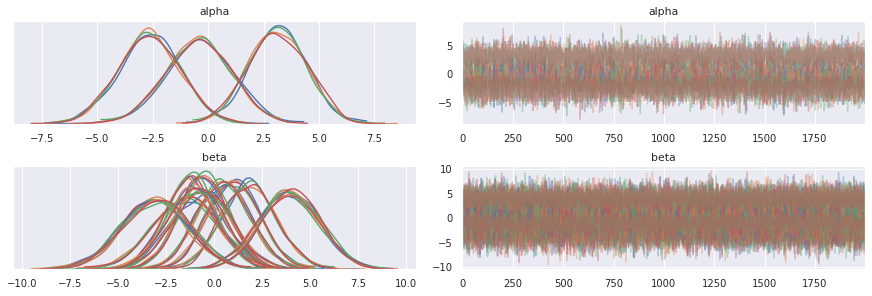

In [19]:
pm.traceplot(trace_s)

## Make some predictions on the training set

In [23]:
# Use average sampled params
data_pred = trace_s['alpha'].mean(axis=0) + np.dot(x_s, trace_s['beta'].mean(axis=0)) 
print(data_pred.shape)

y_pred = []
# For each data sample in the training set...
for point in data_pred:
    y_pred.append(np.exp(point)/np.sum(np.exp(point), axis=0))  # probabilities for each class
    
accuracy = np.sum(y_s == np.argmax(y_pred, axis=1))/len(y_s)
print('accuracy = {:.1f} %'.format(100*accuracy))

(150, 3)
accuracy = 97.3 %
